<a href="https://colab.research.google.com/github/Haritha-Vedam/Haritha-Vedam/blob/ML-codes/Rice_leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rice Leaf Disease Prediction

*   The project aims at developing a model that can identify the disease in the rice leaf as Bacterial Leaf blight or brown spot or leaf smut, based on the data that contains images of the leaves with the disease
*   The challenge here was that jupyter notebook which easily accesses local data crashes with keras and tensorflow
*   Attempting with google colab hence. In google colab, data loading is a problem. A lot of googling helped, and finally figured out a way to do it.
*   The cnn model hasn't run properly, despite trying different combinations. The model didn't converge only.






In [ ]:
#Giving access to google colab to access drive and gave drive the access to my local folders
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Loading data into variables.

In [ ]:
#Setting the path for data
data_dir = '/content/drive/Othercomputers/My MacBook Air/Desktop/Rice Leaf Disease Prediction'
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/Othercomputers/My MacBook Air/Desktop/Rice Leaf Disease Prediction')

In [ ]:
#Loading images from folders in the set path directory
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

In [ ]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

80

In [ ]:
smut = list(data_dir.glob("Leaf smut/*"))
len(smut)

79

In [ ]:
#Creating a dictionary to organise data
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*"))}

In [ ]:
dict

{'bacteria': [PosixPath('/content/drive/Othercomputers/My MacBook Air/Desktop/Rice Leaf Disease Prediction/Bacterial leaf blight/DSC_0702.jpg'),
  PosixPath('/content/drive/Othercomputers/My MacBook Air/Desktop/Rice Leaf Disease Prediction/Bacterial leaf blight/DSC_0377.JPG'),
  PosixPath('/content/drive/Othercomputers/My MacBook Air/Desktop/Rice Leaf Disease Prediction/Bacterial leaf blight/DSC_0375.JPG'),
  PosixPath('/content/drive/Othercomputers/My MacBook Air/Desktop/Rice Leaf Disease Prediction/Bacterial leaf blight/DSC_0366.jpg'),
  PosixPath('/content/drive/Othercomputers/My MacBook Air/Desktop/Rice Leaf Disease Prediction/Bacterial leaf blight/DSC_0700.jpg'),
  PosixPath('/content/drive/Othercomputers/My MacBook Air/Desktop/Rice Leaf Disease Prediction/Bacterial leaf blight/DSC_0701.jpg'),
  PosixPath('/content/drive/Othercomputers/My MacBook Air/Desktop/Rice Leaf Disease Prediction/Bacterial leaf blight/DSC_0396.JPG'),
  PosixPath('/content/drive/Othercomputers/My MacBook Air

# Data Basic Checks and Preprocessing:

In [ ]:
dict.keys()

dict_keys(['bacteria', 'brown', 'smut'])

<BarContainer object of 1 artists>

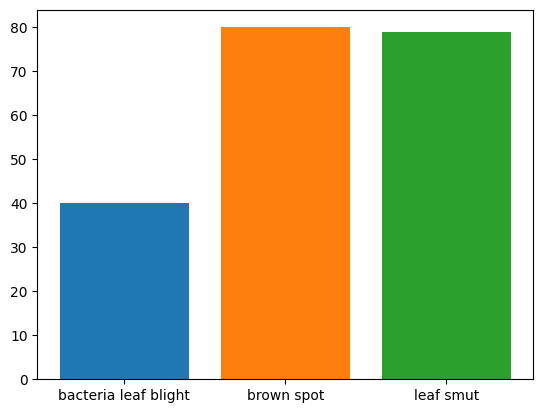

In [ ]:
plt.bar('bacteria leaf blight',len(dict['bacteria']))
plt.bar('brown spot',len(dict['brown']))
plt.bar('leaf smut', len(dict['smut']))

The data seems to be imbalanced. We'll downsize the image resolution first and go into data augmentation later.

In [ ]:
#downscaling the resolution of images from higher resolution (3081x897) to (180,180)
img=cv2.imread(str((dict["smut"][0])))
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
img

array([[[221, 227, 238],
        [222, 228, 239],
        [222, 228, 239],
        ...,
        [215, 223, 240],
        [214, 222, 239],
        [216, 224, 241]],

       [[221, 227, 238],
        [222, 228, 239],
        [222, 228, 239],
        ...,
        [216, 224, 241],
        [216, 224, 241],
        [217, 225, 242]],

       [[221, 227, 238],
        [221, 227, 238],
        [222, 228, 239],
        ...,
        [216, 224, 241],
        [217, 225, 242],
        [215, 223, 240]],

       ...,

       [[226, 231, 240],
        [226, 231, 240],
        [226, 231, 240],
        ...,
        [218, 226, 239],
        [218, 226, 239],
        [218, 226, 239]],

       [[226, 231, 240],
        [226, 231, 240],
        [226, 231, 240],
        ...,
        [218, 226, 239],
        [217, 225, 238],
        [218, 226, 239]],

       [[224, 230, 241],
        [223, 229, 240],
        [224, 230, 241],
        ...,
        [218, 225, 240],
        [216, 223, 238],
        [218, 225, 240]]

In [ ]:
#Loading x and y(target variable) with image strings and category of disease
x = []
y = []
for disease, img_url in dict.items():
    for i in img_url:
        img = cv2.imread(str(i))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        if disease == 'bacteria':
            y.append(0)
        elif disease == 'brown':
            y.append(1)
        else:
            y.append(2)

In [ ]:
print(set(y),len(y))

{0, 1, 2} 199


In [ ]:
print (x,len(x))

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [248, 253, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [248, 253, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [248, 253, 252]

In [ ]:
type(x)

list

In [ ]:
#Converting them from lists to numpy array
x = np.array(x)
y = np.array(y)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
#Data splitting into train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(len(x_test),len(x_train))

40 159


In [ ]:
#Using smote to over-sample the data to make sure training data is balanced
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

train_rows=len(x_train)
x_train = x_train.reshape(train_rows,-1)

x_train, y_train = sm.fit_resample(x_train, y_train)
x_train = x_train.reshape(-1,180,180,3)

In [ ]:
print(len(x_train))

186


In [ ]:
#One hot encoding the target variable
from keras.utils import to_categorical

In [ ]:
y_train = keras.utils.to_categorical(y_train,3,int)
y_test = keras.utils.to_categorical(y_test,3,int)

# Building a CNN Model

In [ ]:
#Creating validation data for neural networks by taking first 5000 inputs, as validation data and rest 55000 as training data
(x_train,x_valid) = (x_train[30:],x_train[:30])
(y_train,y_valid) = (y_train[30:],y_train[:30])

In [ ]:
#Setting up cnn model and training the model
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten
model = Sequential([
  layers.Rescaling(1./255, input_shape=(180,180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='tanh'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(500,activation='relu'),
  layers.Dense(200,activation='sigmoid'),
  layers.Dense(128, activation='tanh'),
  layers.Dense(3,activation='softmax')
])

model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30,validation_data = (x_valid,y_valid))

Epoch 1/30
5/5 [==============================] - 19s 3s/step - loss: 0.3807 - accuracy: 0.3526 - val_loss: 0.4880 - val_accuracy: 0.2667
Epoch 2/30
5/5 [==============================] - 9s 2s/step - loss: 0.4347 - accuracy: 0.3462 - val_loss: 0.4852 - val_accuracy: 0.2667
Epoch 3/30
5/5 [==============================] - 5s 1s/step - loss: 0.3993 - accuracy: 0.3205 - val_loss: 0.3618 - val_accuracy: 0.2667
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.3176 - accuracy: 0.3333 - val_loss: 0.2613 - val_accuracy: 0.4333
Epoch 5/30
5/5 [==============================] - 7s 1s/step - loss: 0.2844 - accuracy: 0.3141 - val_loss: 0.2556 - val_accuracy: 0.4333
Epoch 6/30
5/5 [==============================] - 5s 1s/step - loss: 0.2600 - accuracy: 0.3269 - val_loss: 0.2703 - val_accuracy: 0.3000
Epoch 7/30
5/5 [==============================] - 7s 2s/step - loss: 0.2329 - accuracy: 0.3462 - val_loss: 0.2458 - val_accuracy: 0.2667
Epoch 8/30
5/5 [========================